# Project 7 : Wrangle and Analyze Data

## Project Overview

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

## Project Motivation 

Context

Our goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

## Key Points

Key points to keep in mind when data wrangling for this project:

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

* Cleaning includes merging individual pieces of data according to the rules of tidy data.
 
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## Project Details

Our tasks in this project are as follows:

A.Data wrangling, which consists of:
 1.Gathering data
 2.Assessing data
 3.Cleaning data

B.Storing, analyzing, and visualizing our wrangled data

C.Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations.

# A.Data wrangling

## 1.Gathering data 

From 3 different sources and in 3 different formats:

* downloaded manually from the link provided in the classroom : twitter_archive_enhanced.csv

* downloaded programmatically using the Requests library: image_predictions.tsv

* downloaded manually from the attachment provided in the classroom: tweet_json.txt

I will store each one of them in an corresponding dataframe.

In [4]:
#Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import requests

%matplotlib inline

In [5]:
#Read CSV file
twitter_archive_df = pd.read_csv("twitter-archive-enhanced.csv")

In [6]:
#Read the tsv file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open("image_predictions.tsv",'wb') as file:
    file.write(response.content)
    
image_predictions_df = pd.read_csv("image_predictions.tsv", sep = '\t')

In [7]:
#Read the txt file           
    
# load json data into pandas DataFrame
text_file_path = 'tweet_json.txt'
tweet_json_df = pd.read_json(text_file_path, lines = True)

# extract columns with id, retweet_count and favorite_count
columns= ['id', 'retweet_count', 'favorite_count']
tweet_json_df = tweet_json_df[columns]                       

## 2.Assesing data 

Assesing data means both visually and programmatically.

Visually assessing the data.

In [8]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [247]:
twitter_archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
image_predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [8]:
tweet_json_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [11]:
tweet_json_df.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


Programmatically assessing of data.

In [12]:
twitter_archive_df.shape

(2356, 17)

The twitter_archive_df has 2356 observations and 17 columns.

In [13]:
image_predictions_df.shape

(2075, 12)

The image_predictions_df has 2075 observations and 12 columns.

In [14]:
tweet_json_df.shape

(2354, 3)

The tweet_json_df has 2354 observations and 3 columns.

In [15]:
# Check duplicates
sum(twitter_archive_df.duplicated())

0

In [16]:
#Check datatypes
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
#Check missing values
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
#Describe the dataset
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
#Check duplicates
sum(image_predictions_df.duplicated())

0

In [20]:
#Check datatypes
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
#Check missing values
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
#Describe the dataset
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
#Check duplicates
sum(tweet_json_df.duplicated())

0

In [24]:
#Check datatypes
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [25]:
#Check missing value
tweet_json_df.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [26]:
#Describe the dataset
tweet_json_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


# Summary


Qualiy issues:

1. 'id' column name from the tweet_json_df dataframe, needs to be changed to 'tweet_id'
 
2. drop unnecessary columns with probability and algorithms used, containing non-descriptive columns : 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num', from image_predictions_df dataframe

3. non-descriptive columns for dog breed 'p1' and 'p1_conf'; rename 'p1', 'p1_conf' to 'dog_breed' and 'probability' from image_predictions_df dataframe

4. change 'dog_breed' to lowercase for consistency in the image_predictions_df dataframe

5. drop the columns we don't need, filled with 'Nan', 'in_reply_to_status_id', 'in_reply_to_user_id', from twitter_archive_df dataframe

6. we need only original tweets and no retweets; drop the columns 'retweeted_status_id','retweeted_status_user_id' and 'retweet_status_timestamp' from twitter_archive_df dataframe

7. datatypes inconsistency, for example : timestamp column datatype in twitter_archive_df dataframe is a string instead of datetime datatype

8. there are invalid dog names like : 'a', 'an' and 'the' in twitter_archive_df dataframe

9. rating needs to be calculated and the column needs to be created in twitter_archive_df dataframe

10. there are extremely high values for min and max statistical levels on twitter_archive_df and tweet_json_df dataframes

11. inconsistency on number of observations between the 3 datasets


Tidiness issues:

1. Dog stages: doggo, floofer, pupper, puppo, are spread through several columns, on twitter_archive_df.A dog_stage column can be created and deleted unnecessary ones.

2. The 3 datasets provided needs to be combined.

## 3. Data Cleaning

In [27]:
#Create copies of the dataframes 
twitter_archive_clean = twitter_archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
tweet_json_clean = tweet_json_df.copy()

## Quality issues

## Define
1.change from the 'id' to 'tweet_id' in tweet_json_clean dataframe, so all the 3 datasets can be combined. 

## Code

In [28]:
#Rename the 'id' column from tweet_json_clean dataframe, to 'tweet_id'
tweet_json_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

## Test

In [29]:
tweet_json_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048



## Define
2.drop unnecessary columns with probability and algorithms used, containing non-descriptive columns:'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num', from image_predictions_df dataframe

## Code

In [30]:
#Delete the columns inplace
image_predictions_clean.drop(['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num'], axis=1, inplace=True)

## Test

In [31]:
image_predictions_clean.head()

,tweet_id,jpg_url,p1,p1_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


## Define
3.non-descriptive columns for dog breed 'p1' and 'p1_conf'; rename 'p1', 'p1_conf' to 'dog_breed' and 'probability from image_predictions dataframe

## Code

In [32]:
#Rename the 'p1' and 'p1_conf' columns
image_predictions_clean = image_predictions_clean.rename(columns={'p1':'dog_breed', 'p1_conf':'probability'})

## Test

In [33]:
image_predictions_clean.head()

,tweet_id,jpg_url,dog_breed,probability
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


## Define
4.Change 'dog_breed' to lowercase for consistency in the image_predictions_clean dataframe

## Code

In [34]:
#Change dog breeds to lowercase
image_predictions_clean.dog_breed = image_predictions_clean.dog_breed.str.lower()

## Test

In [35]:
#Check the breeds 
image_predictions_clean.dog_breed.value_counts().sort_values(ascending=True)

african_hunting_dog            1
slug                           1
beaver                         1
fire_engine                    1
bison                          1
espresso                       1
lorikeet                       1
coffee_mug                     1
bookshop                       1
water_bottle                   1
canoe                          1
washer                         1
tailed_frog                    1
loupe                          1
basketball                     1
handkerchief                   1
killer_whale                   1
coral_reef                     1
scotch_terrier                 1
pencil_box                     1
fountain                       1
entlebucher                    1
agama                          1
crash_helmet                   1
rapeseed                       1
candle                         1
revolver                       1
school_bus                     1
restaurant                     1
bonnet                         1
          

## Define
5.drop the columns we don't need, filled with Nan, 'in_reply_to_status_id', 'in_reply_to_user_id' from twitter_archive_df dataframe

## Code

In [36]:
#Drop the columns
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

## Test

In [37]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Define
6.we need only original tweets and no retweets; drop the columns 'retweeted_status_id','retweeted_status_user_id' and 'retweet_status_timestamp' from twitter_archive_df dataframe

## Code

In [38]:
#Delete the columns
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

## Test

In [39]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Define
7.datatypes inconsistency, for example : 'timestamp' column datatype in twitter_archive_df dataframe is a string instead of datetime datatype

## Code

In [40]:
#Change object datatype to datetime for timestamp
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

## Test

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB


## Define
8.there are invalid dog names like : 'a', 'an' and 'the' which needs to be replaced with None in twitter_archive dataframe

## Code

In [42]:
#Check invalid names
twitter_archive_clean['name'].value_counts().sort_values(ascending=True)

Glacier        1
Mya            1
Mary           1
Grizzwald      1
Wafer          1
Goose          1
Jo             1
Anthony        1
Bert           1
Millie         1
Mosby          1
Gordon         1
Ralphy         1
Miley          1
Swagger        1
Obie           1
Kobe           1
Gerbald        1
Pilot          1
Jerome         1
Pawnd          1
Harrison       1
Steve          1
Blipson        1
Arlo           1
Kramer         1
Jonah          1
Kaia           1
Mutt           1
Grizz          1
            ... 
Chester        5
Dave           6
Bella          6
Rusty          6
Leo            6
Stanley        6
Jax            6
Oscar          6
Koda           6
Scout          6
Milo           6
Jack           6
Buddy          7
an             7
Bailey         7
Daisy          7
Toby           7
the            8
Sadie          8
Winston        9
Bo             9
Lola          10
Tucker        10
Penny         10
Oliver        11
Cooper        11
Lucy          11
Charlie       

In [43]:
#Replace invalid names with None
invalid_dog_names = ['a', 'an', 'the']

def valid_names(dataframe):
    if dataframe['name'] in invalid_dog_names:
        return 'None'
    else:
        return dataframe['name']
    
twitter_archive_clean['name'] = twitter_archive_clean.apply(valid_names, axis = 1)

## Test

In [44]:
twitter_archive_clean['name'].value_counts().sort_values(ascending=True)

Comet          1
Boots          1
Mya            1
Grizzwald      1
Wafer          1
Goose          1
Jo             1
Anthony        1
DonDon         1
Mosby          1
Mark           1
Miley          1
Swagger        1
Ralphy         1
Josep          1
Obie           1
Kobe           1
Gerbald        1
Pilot          1
Jerome         1
Blipson        1
Harrison       1
Steve          1
Anna           1
Arlo           1
Kramer         1
Millie         1
Kaia           1
Mutt           1
Grizz          1
            ... 
Gus            5
very           5
Phil           5
Chester        5
Rusty          6
Oscar          6
Jack           6
Dave           6
Stanley        6
Leo            6
Jax            6
Milo           6
Bella          6
Scout          6
Koda           6
Buddy          7
Toby           7
Daisy          7
Bailey         7
Sadie          8
Winston        9
Bo             9
Penny         10
Lola          10
Tucker        10
Cooper        11
Lucy          11
Oliver        

## Tidiness issues

## Define

1.Dog stages: doggo, floofer, pupper, puppo, are spread through several columns on twitter_archive_df dataframe.A dog_stage column can be created and deleted unnecessary ones.

## Code

In [45]:
#Create dog_stages variable with a value of None
twitter_archive_clean['dog_stage'] = "None"

In [46]:
#Floofer
twitter_archive_clean.loc[twitter_archive_clean[twitter_archive_clean['floofer'] == 'floofer'].index, 'dog_stage'] = 'floofer'
#Pupper
twitter_archive_clean.loc[twitter_archive_clean[twitter_archive_clean['pupper'] == 'pupper'].index, 'dog_stage'] = 'pupper'
#Puppo
twitter_archive_clean.loc[twitter_archive_clean[twitter_archive_clean['puppo'] == 'puppo'].index, 'dog_stage'] = 'puppo'
#Doggo
twitter_archive_clean.loc[twitter_archive_clean[twitter_archive_clean['doggo'] == 'doggo'].index, 'dog_stage'] = 'doggo'

In [45]:
#Change the 'dog_stage' data type to category 
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')

## Test

In [47]:
#Check the values
twitter_archive_clean['dog_stage'].value_counts()

None       1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: dog_stage, dtype: int64

In [48]:
#Drop the unnecessary columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [49]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2322,666430724426358785,2015-11-17 01:40:41,"<a href=""http://twitter.com/download/iphone"" r...",Oh boy what a pup! Sunglasses take this one to...,https://twitter.com/dog_rates/status/666430724...,6,10,None,None
464,817415592588222464,2017-01-06 17:00:38,"<a href=""http://twitter.com/download/iphone"" r...",Meet Strudel. He's rather h*ckin pupset that y...,https://www.gofundme.com/help-strudel-walk-aga...,11,10,Strudel,None
2063,671159727754231808,2015-11-30 02:52:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Anthony. He just finished up his maste...,https://twitter.com/dog_rates/status/671159727...,5,10,Anthony,None
2132,670079681849372674,2015-11-27 03:20:20,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fabio. He's a wonderful pup. Can't stay a...,https://twitter.com/dog_rates/status/670079681...,10,10,Fabio,None
141,864873206498414592,2017-05-17 16:00:15,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in Jesus....,https://twitter.com/dog_rates/status/864873206...,14,10,None,None


## Define

2.The 3 datasets provided needs to be combined.

## Code

In [50]:
#Merge of the 3 datasets
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean, on='tweet_id', how='inner')
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='inner')

## Test

In [51]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,dog_breed,probability
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581


# B.Storing, analyzing, and visualizing our wrangled data

In [52]:
#Store the combined dataset to "twitter_archive_master.csv"
twitter_archive_clean.to_csv("twitter_archive_master.csv", index=False)

In [53]:
#Read the twitter_archive_master.csv into a dataframe
df = pd.read_csv('twitter_archive_master.csv')

In [54]:
df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,dog_breed,probability
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581


Visualization 1. Dog breeds Bar Chart

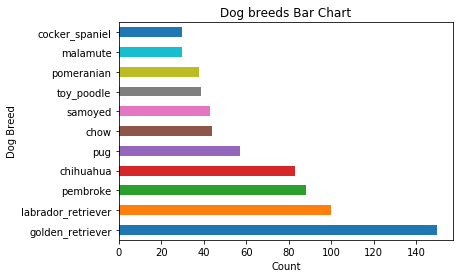

In [55]:
df.query('dog_breed != "None"').dog_breed.value_counts()[:11].plot(kind='barh');
plt.title('Dog breeds Bar Chart')
plt.xlabel('Count')
plt.ylabel('Dog Breed');

From the bar chart we can see that top 2 breeds are golden retriever and labrador retriever.

Visualization 2. Dog names Bar Chart

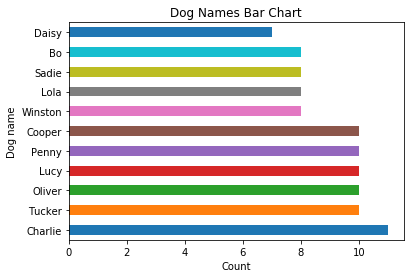

In [56]:
df.query('name != "None"').name.value_counts()[:11].plot(kind='barh')
plt.title('Dog Names Bar Chart')
plt.xlabel('Count')
plt.ylabel('Dog name');

From the bar chart we notice the top 10 dog names and that the most common names is Charlie.

Visualization 3. Dog stages bar chart

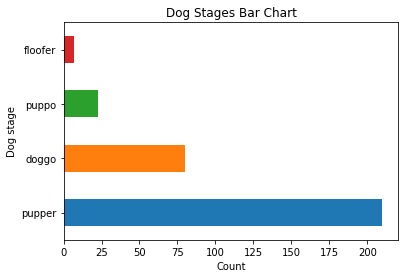

In [57]:
df.query('dog_stage != "None"').dog_stage.value_counts()[:11].plot(kind='barh')
plt.title('Dog Stages Bar Chart')
plt.xlabel('Count')
plt.ylabel('Dog stage');

The most common dog stage is 'pupper', followed by 'doggo'.

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0